## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [49]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [50]:
#Loading ab_data.csv and showing the first five rows of dataframe df

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [51]:
#using df.shape at index 0 shows the number of rows in the dataframe

df.shape[0]

294478

c. The number of unique users in the dataset.

In [52]:
#showing number of unique users in the user_id column

df['user_id'].nunique()

290584

d. The proportion of users converted.

In [53]:
#calculating the average of converted users using the average of the converted column in dataframe

df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [54]:
#grabbing two different queries (one where treatment group and old_page match, and the other where the control group
#matches up with the new_page) then taking the sum of those and displaying the result.  Each query will count up the rows
#that match the query and use index 0 to grab an integer value

query1 = df.query('group == "treatment" and landing_page != "new_page"').count()[0]
query2 = df.query('group == "control" and landing_page != "old_page"').count()[0]

query1 + query2

3893

f. Do any of the rows have missing values?

In [55]:
#using df.info() will show if there are any null values present in the dataframe.  Looking at this, every column shows
#294,478 non-null values resulting in nothing having a null value in the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [56]:
#these next lines will assign two different index values associated where the treatment group is not aligned with new_page
#or control is not aligned with the old_page

index1 = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index
index2 = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')].index

In [9]:
#the first line will create df2 dataframe filtering out the first set of indexes and the second line will remove the 
#second set of indexes
df2 = df.drop(index1)
df2 = df2.drop(index2)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#displaying the number of unique user_ids in the second dataframe

df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#this will assign the duplicate_row variable finding the duplicate user_id in the second dataframe
#this should be user 773192

duplicate_row = df2['user_id'][df2['user_id'].duplicated()]
duplicate_row

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
#this will query the second dataframe where the user_id is equal to 773192

df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#will drop index 2893 from the second dataframe

df2 = df2.drop(df2.index[2893])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#finding the mean of the converted column in the second dataframe

df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#this will narrow the query to the control individuals in the group column and calculate the mean

df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#likewise this will query the treatment group individuals

df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

In [57]:
#this will calculate the observed difference to be used later to find the p-value when doing hypothesis testing
#later in the report

obs_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())

#obs_diff = df2.query('group == "control"')['converted'].mean() - df2.query('group == "treatment"')['converted'].mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [19]:
#this will query the second dataframe and tally up where the landing page is the new page and taking index 0 to get an integer 
#Then it will divide this value by the number of rows in the second dataframe to get probability

df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

*For now, I do not see sufficient evidence to see if the new treatment page leads to more conversions.  As of now, around*
*50% of the users are receiving the new page while the other half of users, the control group, are receiving the old*
*page.  Also, since the proportions are relatively the same, both around 12% conversion, it does not adequately show the new*
*page garnering more conversions than the original page.*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} <= p_{old}$$
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#because p_new and p_old are the same under the assumption of the null hypothesis, this block will calculate the mean
#from the converted column in the first dataframe and set p_new to p_old then display the p_new value

p_new = df['converted'].mean()
p_old = p_new
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#this should be equal to p_new under the null hypothesis

p_old

0.11965919355605512

c. What is $n_{new}$?

In [22]:
#this will count the number of rows in the query where the individuals are in the treatment group

n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
#this will do the same thing in the previous block, but query the individuals in the control group

n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#this will create an array of random values using random.choice using [1,0] for the two choices possible
#then using the n_new variable to create n_new number (145310) 1's and 0's
#the probability, p value, will take the probability of conversion associated with the 1 value (p-new) and the 0 value
#(1-p_new)

new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#this will do the same thing in the previous cell, but doing random.normal n_old times(145274), and respective
#probabilities for old page conversions and not converting from old page (p_old, 1-p_old)

old_page_converted = np.random.choice([1,0], n_old, p=[p_old, 1-p_new])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#this will take the means from new_page_converted and old_page_converted then get the difference between both

(new_page_converted.mean() - old_page_converted.mean())

0.0008859214706158636

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
#this will use random.binomial function so it will calculate the above three blocks 10000 times instead of using a 
#standard loop. Using the binomial function will take a lot less time to execute the following code.
#each iteration will store the difference in the p_diffs array

new_page_converted = np.random.binomial(n_new, p_new, 10000)/ n_new 
old_page_converted = np.random.binomial(n_old, p_old, 10000)/ n_old 
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

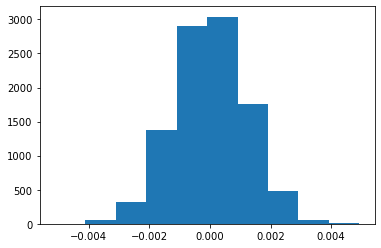

In [29]:
#this will plot the p_diffs distribution.  This should look like a bell curve pattern following the central limit theorem
plt.hist(p_diffs);

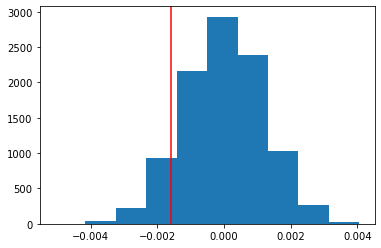

In [58]:
#this block will use the random.normal and simulate 10000 values using the standard deviation of p_diffs as well as the
#zero difference between p_old and p_new under the null hypothesis. Next it will plot this distribution of values and show
#the observed difference calculated earlier as a red line in the histogram

null_vals = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(null_vals);
plt.axvline(obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [59]:
#this will show the proportion where the differences in the p_diffs array are greater than the observed difference using the
#mean

(null_vals > obs_diff).mean()

0.9076

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*The answer displayed here is called the p-value.  Also, in the above histogram, it shows roughly a 90% section of the*
*distribution to the right of the red-line while 91% of the values are to the left.  Because the p-value was calculated to*
*roughly 0.90, it is above the Type I error rate of 0.05.  Therefore, we fail to reject the null hypothesis where new page*
*conversions is less than or equal to the old page conversion rate*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
#this will import statsmodels.api library as sm.  Also, the convert_old value is assigned to the number of successful
#conversions in the control group while the convert_new is assigned the number of successful conversions from the treatment
#group.  Index 1 only displays the count of the '1' values in each respective query.  n_old and n_new take the same
#values as they were assigned to previously

import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].value_counts()[1]
convert_new = df2.query('group == "treatment"')['converted'].value_counts()[1]
n_old = n_old 
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
#these lines will set up the arrays for the z-test and use the alternative as the larger value when performing the z-test
#trying to prove the alternate hypothesis

count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='smaller')
print('p-value =', pval ,'; z-score =', stat)

p-value = 0.9050583127590245 ; z-score = 1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*The p-value found using the z-test proportions is the same as the p-value found in part j*

*Since the p-value using the z-test is above 0.05, we fail to reject the null hypothesis.  In addition, since the z-score is below 1.5, it also suggests we accept the null hypothesis.*


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

*My guess is a logistic regression model because we have to deal with categorical and dummy variables, and possibly interactive
relationships between the x-values.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#this will add an intercept column in the second dataframe with all values assigned to 1.  Also, it will create an ab_page1
#column and an ab_page column.  I chose to use the ab_column as the second column as pd.get_dummies will assign 0 for control
#and 1 for treatment.  It will then display the first five lines of the second dataset with the added columns.

df2['intercept'] = 1
df2[['ab_page1', 'ab_page']] = pd.get_dummies(df['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page1,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [35]:
#because we do not need the ab_page1 column, it will be dropped from the second dataframe
df2.drop('ab_page1', axis = 1, inplace = True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [61]:
#this will assign lm to using the OLS function in stats models to compare the dependent column, converted to the intercept
#column and the ab_page column

lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [62]:
#this will fit the results then display the summary of the results from the regression model

results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:28:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*The p-value shown for ab_page is 0.19.  The regression model is comparing a two-sided hypothesis whether the null is true or the alternative is true.  In part II, it was one-sided based on a range of values above the observed difference.  Because the p-value is 0.19 and still above 0.05 error rate, we still fail to reject the null hypothesis.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*I think the more factors that are added to the regression model, it would influence the results and possibly make the model either more accurate or inaccurate.  One factor to look at is the timestamp to see if this affects a person converting to the new page.  Others include geographical region as well as an interactive relationship between each of these values.  It might
be worth to experiment to see if any combination of factors would influence conversion.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
#loading countries.csv and joining both dataframes using the common user_id column
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
#this displays the different countries in the dataset to base the dummy variables
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [43]:
#adding intercept column to new dataframe
#adding CA, UK, and US columns to dataset using pd.get_dummies from the countries column then displaying the first ten lines

df_new['intercept'] = 1
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1,0,0,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1,0,0,1
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0,1
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0,1


In [63]:
#creating lm2 linear model to compare conversion based on the users in the US and the UK

lm2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])

In [64]:
#fitting lm2 into results2 and displaying summary

results2 = lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:               1.521e-05
Time:                        03:28:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

*Looking at the regression model p-values of the US and the UK, neither of these values are stastically significant, therefore having no impact on conversion.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
#creating two new columns to set up a logistic regression model to see if the assigned group has an interactive relationship 
#with the location of the users' country then displaying first ten rows

df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,1
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1,0,0,1,0,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1,0,0,1,0,1
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0,1,0,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0,1,0,0


In [47]:
#crating log_mod logistic regression model comparing converted column with group, country, and interactive relationship
#between the assigned group and the users' country

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])

In [48]:
#fitting results in results3 and displaying the results

results3 = log_mod.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:               3.482e-05
Time:                        12:25:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

*Using the logistic regression model, none of the values show any statistical significance as all p-values are above the Type
1 error rate of 0.05.  We could go further and exponentiate the coefficients to see how each factor relates to the conversion
rate, but would be pointless due to the fact there is no p-value that is above the Type 1 error rate.*

<a id='conclusions'></a>
## Conclusions

*In conclusion, none of the models used in the report adquately demonstrated that the new page would garner any more conversions
than the old page that is currently there.  Using statistical, hypothesis, and regression testing all failed to reject the
null hypothesis that the conversion rate of the old page is equal to or better than the new one created.*

*One more factor could have been tested, timestamp, to see if that had any effect on conversion rate.  However, since all the A/B tests done in this report demonstrated that any factor had a significant impact on conversion, it might be best to scrap the new page and stick with the old page.* 
